Name : Saniya Mansuri Roll no: 20CO071



2] Binary classification using Deep Neural Networks Example: Classify movie reviews into
positive" reviews and "negative" reviews, just based on the text content of the reviews.
Use IMDB dataset
> Add blockquote



In [ ]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)


17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
train_labels[0]


1

In [ ]:
print(type([max(sequence) for sequence in train_data]))
# Find the maximum of all max indexes
max([max(sequence) for sequence in train_data])

<class 'list'>


9999

In [ ]:
# Let's quickly decode a review
# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()
# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Step 3: decode the review, mapping integer indices to words
#
# indices are off by 3 because 0, 1, and 2 are reserverd indices for "padding", "Start of se
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_review


1641221/1641221 [==============================] - 1s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
len(reverse_word_index)


88584

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension)) # Creates an all zero matrix of shape
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1 # Sets specific indices of results[i]
  return results
# Vectorize training Data
X_train = vectorize_sequences(train_data)
# Vectorize testing Data
X_test = vectorize_sequences(test_data)

In [ ]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
X_train.shape

(25000, 10000)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(
optimizer=optimizers.RMSprop(learning_rate=0.001),
loss = losses.binary_crossentropy,
metrics = [metrics.binary_accuracy]
)


In [ ]:
# Input for Validation
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [ ]:
history = model.fit(
partial_X_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(X_val, y_val)
)


Epoch 1/20
30/30 [==============================] - 4s 102ms/step - loss: 0.5397 - binary_accuracy: 0.7715 - val_loss: 0.4125 - val_binary_accuracy: 0.8638
Epoch 2/20
30/30 [==============================] - 3s 117ms/step - loss: 0.3380 - binary_accuracy: 0.8923 - val_loss: 0.3218 - val_binary_accuracy: 0.8822
Epoch 3/20
30/30 [==============================] - 3s 103ms/step - loss: 0.2503 - binary_accuracy: 0.9199 - val_loss: 0.2877 - val_binary_accuracy: 0.8872
Epoch 4/20
30/30 [==============================] - 3s 108ms/step - loss: 0.2046 - binary_accuracy: 0.9329 - val_loss: 0.2903 - val_binary_accuracy: 0.8838
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1721 - binary_accuracy: 0.9446 - val_loss: 0.2794 - val_binary_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1488 - binary_accuracy: 0.9523 - val_loss: 0.2882 - val_binary_accuracy: 0.8837
Epoch 7/20
30/30 [==============================] - 1s 37ms/step -

In [ ]:
history_dict = history.history
history_dict.keys()


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

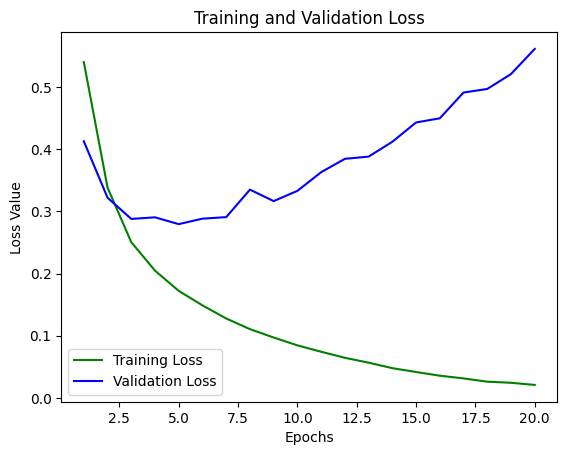

In [ ]:
# Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()


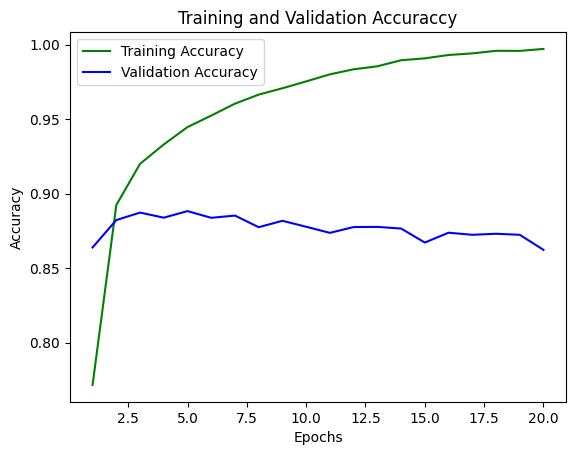

In [ ]:


# Training and Validation Accuracy
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'g', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
model.fit(
partial_X_train,
partial_y_train,
epochs=3,
batch_size=512,
validation_data=(X_val, y_val)
)

Epoch 1/3
30/30 [==============================] - 3s 88ms/step - loss: 0.0185 - binary_accuracy: 0.9976 - val_loss: 0.5615 - val_binary_accuracy: 0.8704
Epoch 2/3
30/30 [==============================] - 1s 48ms/step - loss: 0.0165 - binary_accuracy: 0.9979 - val_loss: 0.5823 - val_binary_accuracy: 0.8701
Epoch 3/3
30/30 [==============================] - 1s 48ms/step - loss: 0.0111 - binary_accuracy: 0.9994 - val_loss: 0.6601 - val_binary_accuracy: 0.8528


In [ ]:
# Making Predictions for testing data
np.set_printoptions(suppress=True)
result = model.predict(X_test)


782/782 [==============================] - 2s 2ms/step


In [ ]:
result

array([[0.0079013 ],
       [0.9999999 ],
       [0.32366797],
       ...,
       [0.0019206 ],
       [0.00282049],
       [0.8782168 ]], dtype=float32)

In [ ]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
  y_pred[i] = np.round(score)

<ipython-input-26-a8875d258568>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.round(score)


In [ ]:
mae = metrics.mean_absolute_error(y_pred, y_test)
mae


<tf.Tensor: shape=(), dtype=float32, numpy=0.15632>